Alvaro David Montero Barraza
Tecnologías de Lenguaje Natural
5BV1
Ingeniería en Inteligencia Artificial

Este programa realiza un análisis exploratorio a un texto, posteriormente se aplican tecnicas de normalización al texto
Y un análisis exploratorio al resultado normalizado

Análisis Exploratorio de texto

Tokens

In [6]:
#Importacion de librerias
import spacy
from collections import Counter
from nltk.tokenize import word_tokenize

english_text=0
with open("english.txt","r",encoding="utf-8") as f:
    english_text=f.read()
#print(english_text)
english_text=english_text.lower()

tokens=word_tokenize(english_text,language='english')

print(tokens)
print("\nNumero total de tokens en el texto: "+str(len(tokens)))


['my', 'own', 'journey', 'toward', 'language', 'was', 'sparked', 'in', '1996', 'when', 'i', 'discovered', 'keith', 'basso', '’', 's', 'astonishing', 'book', 'wisdom', 'sits', 'in', 'places', '.', 'writing', 'about', 'the', 'unique', 'place-making', 'language', 'of', 'the', 'western', 'apache', ',', 'basso', 'described', 'language', 'in', 'a', 'way', 'that', 'i', '’', 'd', 'never', 'considered', 'before', ',', 'as', 'roots', 'and', 'fragments', 'strung', 'together', 'to', 'sing', 'of', 'the', 'land', '.', 'this', 'idea', 'intrigued', 'me', 'so', 'much', 'that', 'i', 'began', 'carrying', 'donald', 'borror', '’', 's', 'classic', 'little', 'book', ',', 'the', 'dictionary', 'of', 'word', 'roots', 'and', 'combining', 'forms', ',', 'with', 'me', 'on', 'all', 'my', 'hikes', '(', 'a', 'practice', 'which', 'i', '’', 've', 'continued', 'on', 'a', 'daily', 'basis', 'for', 'nearly', 'twenty', 'years', 'and', 'on', 'thousands', 'of', 'miles', 'of', 'trails', ')', 'in', 'order', 'to', 'learn', 'the',

Tokens únicos

In [7]:
tokens_freq=Counter(tokens) #Contador de frecuencia de tokens

unique_tokens=[token for token,freq in tokens_freq.items() if freq==1]

print(unique_tokens)

print("\nNumero de tokens unicos "+str(len(unique_tokens)))



['journey', 'toward', 'was', 'sparked', '1996', 'discovered', 'keith', 'astonishing', 'wisdom', 'sits', 'writing', 'about', 'unique', 'place-making', 'western', 'apache', 'described', 'way', 'd', 'never', 'considered', 'before', 'fragments', 'strung', 'together', 'sing', 'idea', 'intrigued', 'much', 'carrying', 'donald', 'borror', 'classic', 'dictionary', 'combining', 'forms', 'all', '(', 'practice', 've', 'continued', 'daily', 'basis', 'nearly', 'twenty', 'thousands', 'miles', 'trails', ')', 'order', 'learn', 'meaning', 'origin', 'elements', 'at', 'moment', 'they', 'occurred', 'while', 'walking', 'landscapes', 'seemed', 'more', 'than', 'quirky', 'hobby', 'no', 'real', 'intent', 'or', 'direction', 'but', 'then', 'friend', 'introduced', 'calvert', 'watkins', 'magisterial', 'survey', 'indo-european', 'poetics', 'how', 'kill', 'dragon', 'flash', 'realized', 'there', 'might', 'be', 'untapped', 'ways', 'speak', 'magic', 'depths', 'human', 'spirit', 'four-year', 'quest', 'read', 'every', 'co

Histograma de los 15 tokens mas comunes

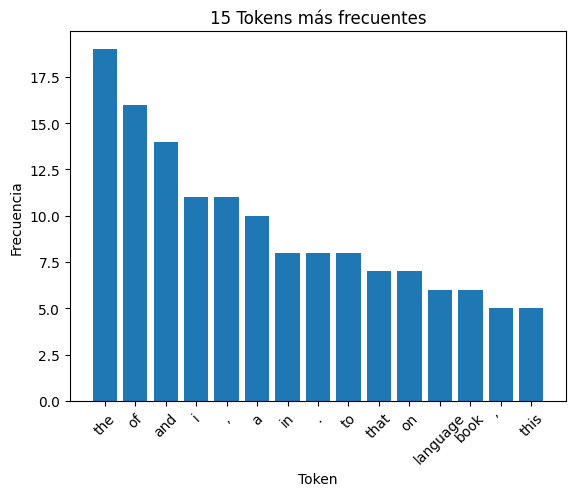

In [8]:
import matplotlib.pyplot as plt
ordered_tokens=tokens_freq.most_common(15)
tokens_graph=[token[0] for token in ordered_tokens]
token_freq=[token[1] for token in ordered_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens más frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()


Histograma de los 15 tokens menos comunes

Hay 161 tokens que comparten esa característica


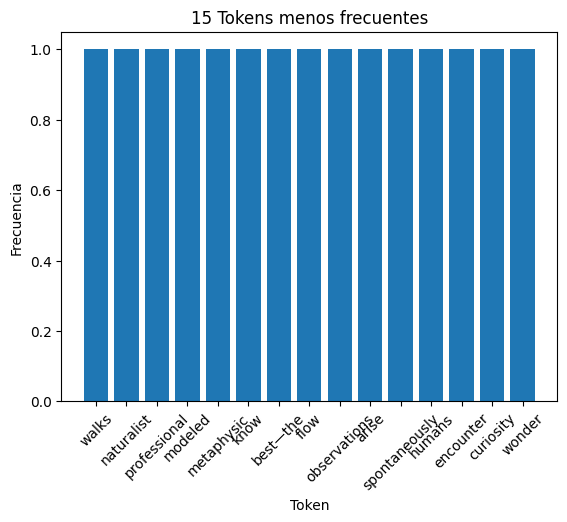

In [9]:
ordered_tokens=tokens_freq.most_common()
less_common_tokens = ordered_tokens[-15:]

tokens_graph=[token[0] for token in less_common_tokens]
token_freq=[token[1] for token in less_common_tokens]

plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens menos frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
print("Hay "+str(len(unique_tokens))+" tokens que comparten esa característica")
plt.show()



Normalización de texto

In [17]:

from nltk.stem import SnowballStemmer
 
tokens_stopless=[token for token in doc if not token.is_stop]

stemmer=SnowballStemmer("spanish")

stems=[stemmer.stem(token.lemma_) for token in tokens_stopless]
print("Stemming")
print(stems)

lemmas_pos=[(token.lemma_,token.pos_) for token in nlp(" ".join(stems))]
print("Lemmas")
print(lemmas_pos)


Stemming
['general', ',', 'pens', 'complej', 'lenguaj', '.', '\n', 'comport', 'intuit', 'utiliz', 'transmit', 'inform', 'signific', 'señal', '\n', 'semant', ',', 'palabr', ',', 'sign', 'imag', '.', 'facil', 'aprend', 'idiom', '\n', 'adolescent', 'comport', 'repet', 'entren', ',', '\n', 'camin', '.', 'asim', ',', 'idiom', 'conjunt', 'regl', 'estrict', ',', '\n', 'excepcion', 'innumer', ',', 'ejempl', ':', 'sustant', 'termin', '‘', '’', 'femenin', ',', '\n', 'cas', 'sustant', '‘', 'problem', '‘', '.', ',', 'human', 'result', 'natural', '\n', 'extrem', 'dificil', 'comput', ',', 'lidi', 'cantid', '\n', 'dat', 'estructur', ',', 'ausenci', 'regl', 'formal', 'falt', 'context', 'intencion', '\n', 'real', '.', 'aprendizaj', 'automat', 'inteligent', 'artificial', '(', 'ia', ')', 'gan', 'fuerz', 'llam', '\n', 'atencion', ',', 'puest', 'human', 'depend', 'sistem', 'informat', '\n', 'comunicar el', 'tare', '.', 'med', 'ia', 'volv', 'sofistic', ',', '\n', 'proces', 'lenguaj', 'natural', '(', 'pln', 